<a href="https://colab.research.google.com/github/wojciechsadlik/MGU-CGANMusicConverter/blob/main/music_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music Genre Classifier

Dataset: https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

In [1]:
import librosa
import numpy as np
import os
import tensorflow as tf
import sklearn.preprocessing
import sklearn.model_selection
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CSV_PATH = './gtzan_dataset/features_3_sec.csv'

In [3]:
csv_frame = pd.read_csv(CSV_PATH)

In [4]:
csv_frame.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [5]:
csv_frame = csv_frame.drop('filename', axis=1)
csv_frame = csv_frame.drop('length', axis=1)

In [6]:
csv_frame.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [7]:
labels = csv_frame.pop('label')

In [8]:
data = csv_frame.to_numpy()

In [9]:
labels = labels.to_numpy()

In [10]:
label_binarizer = sklearn.preprocessing.LabelBinarizer()

labels = label_binarizer.fit_transform(labels)

In [11]:
print(labels, labels.shape)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]] (9990, 10)


In [12]:
print(data, data.shape)

[[ 3.35406363e-01  9.10482928e-02  1.30405024e-01 ...  3.36180725e+01
  -2.43026793e-01  4.37717667e+01]
 [ 3.43065351e-01  8.61465260e-02  1.12699248e-01 ...  9.70308304e+01
   5.78406334e+00  5.99430809e+01]
 [ 3.46814752e-01  9.22428891e-02  1.32003382e-01 ...  5.30508347e+01
   2.51737475e+00  3.31051216e+01]
 ...
 [ 3.47480893e-01  8.90194401e-02  5.24028763e-02 ...  4.85823784e+01
  -2.99545288e-01  4.15869904e+01]
 [ 3.87527317e-01  8.48154277e-02  6.64298981e-02 ...  2.48436127e+01
   6.75824106e-01  1.27877502e+01]
 [ 3.69292945e-01  8.67586955e-02  5.05241193e-02 ...  3.94859009e+01
  -3.41253424e+00  3.17274895e+01]] (9990, 57)


In [13]:
standard_scaler = sklearn.preprocessing.StandardScaler()
data = standard_scaler.fit_transform(data)

In [14]:
print(data, data.shape)

[[-0.48780784  0.64052047 -0.00662408 ... -0.51356204  0.12841417
  -0.29178072]
 [-0.40314187  0.13183473 -0.26494432 ...  1.01138445  1.27578001
   0.05642464]
 [-0.36169428  0.7644909   0.01669533 ... -0.04624405  0.65390663
  -0.52145798]
 ...
 [-0.35433044  0.42997426 -1.14464442 ... -0.15370124  0.11765485
  -0.33882395]
 [ 0.0883611  -0.00630133 -0.93999575 ... -0.72456977  0.30333409
  -0.95893743]
 [-0.11321002  0.19536324 -1.17205474 ... -0.37245283 -0.47495901
  -0.55112155]] (9990, 57)


In [15]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, labels, test_size=0.25)

In [16]:
print(X_train, X_train.shape)

[[ 2.09153775 -2.94706925  1.7591484  ... -0.71405342  0.31779897
  -0.45022674]
 [-0.46631561  0.07818685  0.71475344 ...  0.57645262  1.89312913
   0.69155964]
 [ 0.10966819  0.63052466 -0.01425011 ... -0.57350898 -0.20080128
  -0.50346983]
 ...
 [-1.61643762 -0.53137486 -0.85816237 ... -0.42418319 -1.8014537
  -0.17789832]
 [-0.99780704 -0.64812058 -0.47984404 ... -0.60680062  0.60933191
  -0.42671334]
 [-1.50250723  0.30722703 -0.56015387 ...  0.17712413 -1.31611471
  -0.26599191]] (7492, 57)


In [17]:
print(y_train, y_train.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]] (7492, 10)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               29696     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/200
59/59 - 1s - loss: 1.8916 - accuracy: 0.3247 - val_loss: 1.3158 - val_accuracy: 0.5536
Epoch 2/200
59/59 - 0s - loss: 1.3646 - accuracy: 0.5339 - val_loss: 0.9768 - val_accuracy: 0.6825
Epoch 3/200
59/59 - 0s - loss: 1.1206 - accuracy: 0.6233 - val_loss: 0.8263 - val_accuracy: 0.7298
Epoch 4/200
59/59 - 0s - loss: 0.9663 - accuracy: 0.6751 - val_loss: 0.7465 - val_accuracy: 0.7514
Epoch 5/200
59/59 - 0s - loss: 0.8690 - accuracy: 0.7146 - val_loss: 0.6550 - val_accuracy: 0.7886
Epoch 6/200
59/59 - 0s - loss: 0.7730 - accuracy: 0.7488 - val_loss: 0.6227 - val_accuracy: 0.7974
Epoch 7/200
59/59 - 0s - loss: 0.6903 - accuracy: 0.7786 - val_loss: 0.5576 - val_accuracy: 0.8263
Epoch 8/200
59/59 - 0s - loss: 0.6334 - accuracy: 0.7920 - val_loss: 0.5069 - val_accuracy: 0.8343
Epoch 9/200
59/59 - 0s - loss: 0.5593 - accuracy: 0.8229 - val_loss: 0.4901 - val_accuracy: 0.8363
Epoch 10/200
59/59 - 0s - loss: 0.5102 - accuracy: 0.8370 - val_loss: 0.4603 - val_accuracy: 0.8531
Epoch 11/

59/59 - 0s - loss: 0.0643 - accuracy: 0.9817 - val_loss: 0.4040 - val_accuracy: 0.9159
Epoch 84/200
59/59 - 0s - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.4443 - val_accuracy: 0.9127
Epoch 85/200
59/59 - 0s - loss: 0.0560 - accuracy: 0.9860 - val_loss: 0.4189 - val_accuracy: 0.9175
Epoch 86/200
59/59 - 0s - loss: 0.0619 - accuracy: 0.9844 - val_loss: 0.4099 - val_accuracy: 0.9179
Epoch 87/200
59/59 - 0s - loss: 0.0517 - accuracy: 0.9864 - val_loss: 0.4015 - val_accuracy: 0.9203
Epoch 88/200
59/59 - 0s - loss: 0.0632 - accuracy: 0.9828 - val_loss: 0.3943 - val_accuracy: 0.9203
Epoch 89/200
59/59 - 0s - loss: 0.0533 - accuracy: 0.9869 - val_loss: 0.4108 - val_accuracy: 0.9227
Epoch 90/200
59/59 - 0s - loss: 0.0916 - accuracy: 0.9781 - val_loss: 0.4214 - val_accuracy: 0.9167
Epoch 91/200
59/59 - 0s - loss: 0.0596 - accuracy: 0.9832 - val_loss: 0.3979 - val_accuracy: 0.9223
Epoch 92/200
59/59 - 0s - loss: 0.0563 - accuracy: 0.9851 - val_loss: 0.4038 - val_accuracy: 0.9147
Epoch 93/200


Epoch 165/200
59/59 - 0s - loss: 0.0323 - accuracy: 0.9904 - val_loss: 0.3593 - val_accuracy: 0.9327
Epoch 166/200
59/59 - 0s - loss: 0.0276 - accuracy: 0.9927 - val_loss: 0.4219 - val_accuracy: 0.9323
Epoch 167/200
59/59 - 0s - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.4385 - val_accuracy: 0.9311
Epoch 168/200
59/59 - 0s - loss: 0.0371 - accuracy: 0.9900 - val_loss: 0.3886 - val_accuracy: 0.9319
Epoch 169/200
59/59 - 0s - loss: 0.0364 - accuracy: 0.9899 - val_loss: 0.3943 - val_accuracy: 0.9359
Epoch 170/200
59/59 - 0s - loss: 0.0280 - accuracy: 0.9920 - val_loss: 0.4073 - val_accuracy: 0.9319
Epoch 171/200
59/59 - 0s - loss: 0.0343 - accuracy: 0.9900 - val_loss: 0.4010 - val_accuracy: 0.9291
Epoch 172/200
59/59 - 0s - loss: 0.0476 - accuracy: 0.9883 - val_loss: 0.3853 - val_accuracy: 0.9355
Epoch 173/200
59/59 - 0s - loss: 0.0289 - accuracy: 0.9919 - val_loss: 0.3741 - val_accuracy: 0.9327
Epoch 174/200
59/59 - 0s - loss: 0.0340 - accuracy: 0.9915 - val_loss: 0.4035 - val_accurac

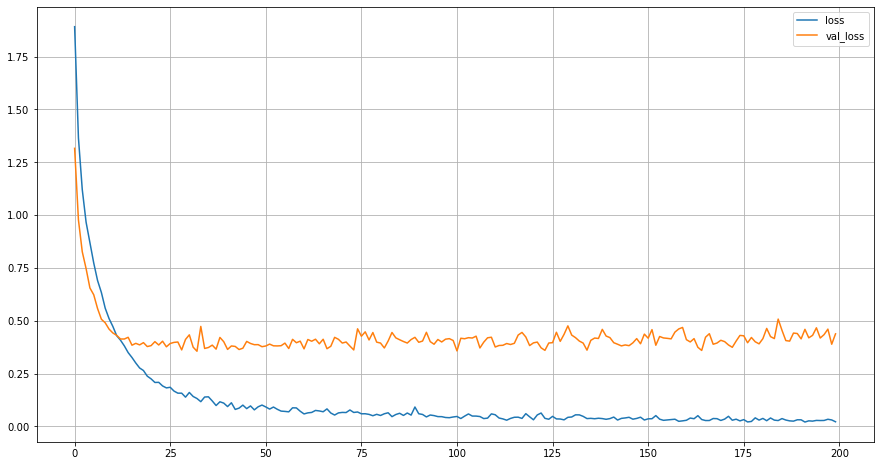

In [21]:
plt.figure(figsize=(15,8))
pd.DataFrame(history.history)['loss'].plot()
pd.DataFrame(history.history)['val_loss'].plot()
plt.grid()
plt.legend()
plt.show()

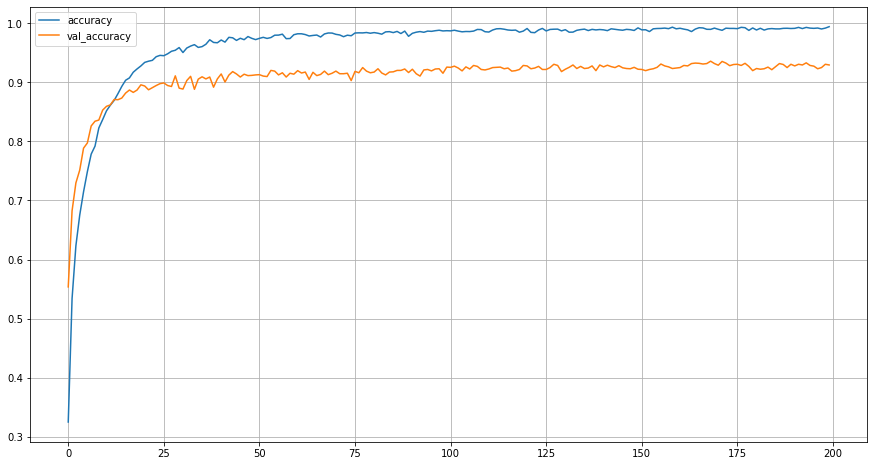

In [22]:
plt.figure(figsize=(15,8))
pd.DataFrame(history.history)['accuracy'].plot()
pd.DataFrame(history.history)['val_accuracy'].plot()
plt.grid()
plt.legend()
plt.show()

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

79/79 [==============================] - 0s 539us/step - loss: 0.4378 - accuracy: 0.9295
[0.43782666325569153, 0.9295436143875122]
